# Import Basic Libararies

In [9]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
# for showing maximum columns which are present in dataset
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [5]:
# show top 5 rows in dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,11.0,NaN,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [6]:
# show random 5 rows
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2172,flat,breez global heights,sohna road,0.28,7142.0,392.0,Carpet area: 399 (37.07 sq.m.),1,1,1,4.0,NaN,New Property,NaN,NaN,399.0,0,0,0,0,0,1,26
2231,flat,central park flower valley aqua front towers,sector 33,2.00,11179.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3+,8.0,North-East,New Property,1789.0,NaN,NaN,0,0,0,0,0,0,23
199,flat,signature global the millennia,sector 37d,0.55,9166.0,600.0,Super Built up area 600(55.74 sq.m.),2,2,3,3.0,NaN,New Property,600.0,NaN,NaN,0,0,0,0,0,0,53
1080,house,independent,sector 25,11.00,35530.0,3096.0,Plot area 344(287.63 sq.m.),5,5,3+,2.0,NaN,Relatively New,NaN,344.0,NaN,1,1,1,1,0,0,29
817,flat,signature global park,sohna road,0.83,7410.0,1120.0,Carpet area: 1120 (104.05 sq.m.),3,2,2,1.0,NaN,New Property,NaN,NaN,1120.0,0,0,0,0,0,0,16


In [7]:
# shape of the data
df.shape

(3677, 23)

* Before Outliers treatment we have 3677 rows and 23 columns 

In [8]:
# columns in dataset where we have to do Outliers treatment
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

* In some columns we got categorical dataset so we not work on that ,we work on only Numerical dataset

## Price 

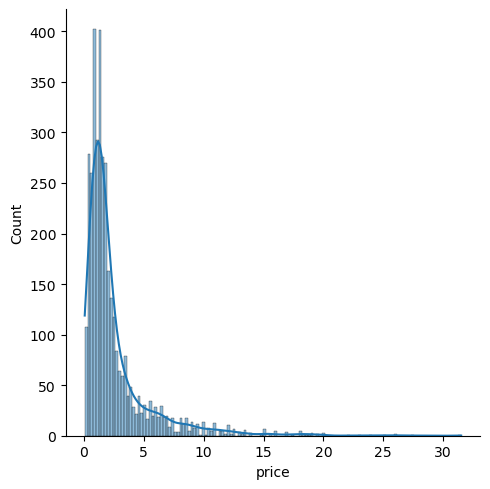

In [12]:
sns.displot(df['price'],kde=True)

* This Distplot shows that we have left skewed distribution, so we use IQR method for treatment of Outliers

<AxesSubplot:>

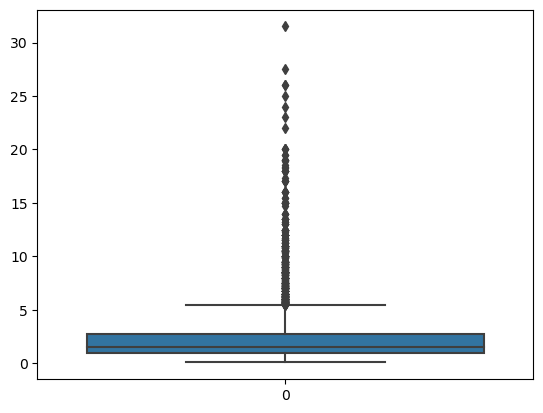

In [13]:
sns.boxplot(df['price'])

* Box plot shows there are so many outliers but in this dataset there are some genuine outliers as well so we look first into it.

In [14]:
# calculate the IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identifying Outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats


(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [15]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3773,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,74
1839,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,2,42
2671,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
497,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,2,138
2700,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
783,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1338,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1,1,1,1,0,2,145
371,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
761,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
155,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,2,153
